In [10]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [11]:
import os
import numpy as np
from load_gan import load_gan
from load_cases import load_cases, load_save_name
from train_gan import train_gan
from evaluation import evaluation
from keras.datasets import mnist

os.environ["KERAS_BACKEND"] = "tensorflow"

In [12]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = (x_train.astype(np.float32) - 127.5)/127.5
x_test = (x_test.astype(np.float32) - 127.5)/127.5
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [31]:
epochs = 10
randomDim = 10
batchSize = 128
examples = 100
cases = load_cases(loss_bases=["Goodfellow"],
                   link_modes=["alpha"],
                   alphas=[1.],
                   offsets=[0.])

In [ ]:
for case in cases:
    print(case)
    save_name = load_save_name(case)
    generator, discriminator, gan = load_gan(offset=case["offset"],
                                             alpha=case["alpha"],
                                             randomDim=randomDim,
                                             link_mode=case["link_mode"],
                                             power=case["power"],
                                             mult=case["mult"],
                                             sqrt=case["sqrt"],
                                             loss_base=case["loss_base"])

    to_be_trusted, disc_loss, gen_loss, hurting = train_gan(disc=discriminator,
                                                            gen=generator,
                                                            gan=gan,
                                                            x_train=x_train,
                                                            epochs=epochs,
                                                            batch_size=batchSize,
                                                            d_loss_limit=0.05,
                                                            randomDim=randomDim)
    if to_be_trusted:
        location = "results/" + case["loss_base"] + "/" + case["link_mode"] + "/" + save_name
        evaluation(generator=generator,
                   randomDim=randomDim,
                   location=location,
                   examples=examples, title=save_name,
                   hurting=hurting, gen_loss=gen_loss, disc_loss=disc_loss, x_test=x_test[:examples*examples])

print("LETS GO TO SLEEP \n "*10)

{'link_mode': 'alpha', 'loss_base': 'Goodfellow', 'alpha': 1.0, 'offset': 0.0, 'power': None, 'mult': None, 'sqrt': None}


/home/peseux/Desktop/gitELECOM/NovGan/load_gan.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=10, kernel_initializer=<keras.ini..., kernel_constraint=None)`
  W_constraint=W_constraint))
/home/peseux/Desktop/gitELECOM/NovGan/load_gan.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_constraint=None)`
  W_constraint=W_constraint))
/home/peseux/Desktop/gitELECOM/NovGan/load_gan.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1024, kernel_constraint=None)`
  W_constraint=W_constraint))
/home/peseux/Desktop/gitELECOM/NovGan/load_gan.py:35: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(784, activation="tanh", kernel_constraint=None)`
  activation='tanh'))
/home/peseux/Desktop/gitELECOM/NovGan/load_gan.py:41: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1024, input_dim=784, kernel_initializer=<keras.ini..., kernel_constraint=None)`
  W_constraint=W_constrai

In [19]:
noise = np.random.normal(0, 1, size=[examples, randomDim])

In [20]:
images = generator.predict(noise)

In [21]:
discriminator.evaluate(images, np.zeros(examples))

100/100 [==============================] - 0s 116us/step


nan

In [22]:
discriminator.predict(images)

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

In [23]:
images

array([[-0.00602289,  0.09439457, -0.01290697, ..., -0.01002296,
        -0.01356571, -0.03490845],
       [ 0.05854309,  0.04202292,  0.01538342, ..., -0.02914978,
         0.0278034 , -0.05236125],
       [ 0.02017095,  0.01775617,  0.06100658, ..., -0.01863598,
         0.00591768, -0.04927149],
       ...,
       [-0.05316373,  0.01206096,  0.03593345, ...,  0.020241  ,
         0.01995276, -0.07277139],
       [-0.01122777,  0.02960726, -0.00363794, ..., -0.01871239,
        -0.0184933 , -0.02331436],
       [ 0.02150963,  0.00651685,  0.0837194 , ..., -0.04553242,
         0.05709358, -0.07160761]], dtype=float32)

In [25]:
from matplotlib import pyplot as plt

In [26]:
def plotImages(generatedImages, dim=(10,10), title="title"):
    plt.figure(figsize=dim)
    plt.title(title)
    for i in range(generatedImages.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generatedImages[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    plt.close()

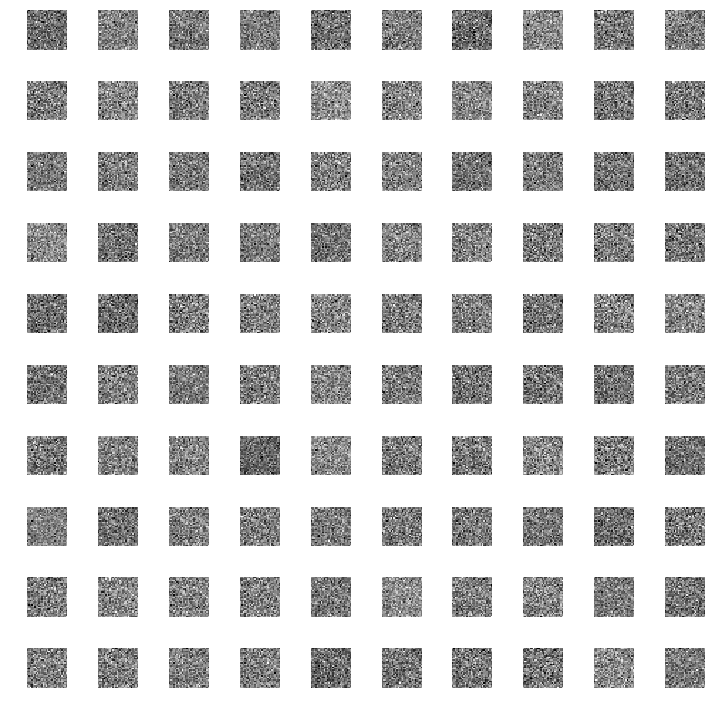

In [30]:
plotImages(images.reshape(100, 28,28))

In [29]:
np.sqrt(784)

28.0